### Student details

Student name: Vilohit Keshava Murthy Achar

Student ID: 23077751

# Task 1: Adaline and Gradient Descent

* Iris Data Data obtained from https://archive.ics.uci.edu/ml/datasets/iris


In [1]:
# import dependencies
import numpy as np

### Adaline class (provided)
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [2]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [3]:
import pandas as pd
df = pd.read_csv('/content/iris_data.csv', header=0)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

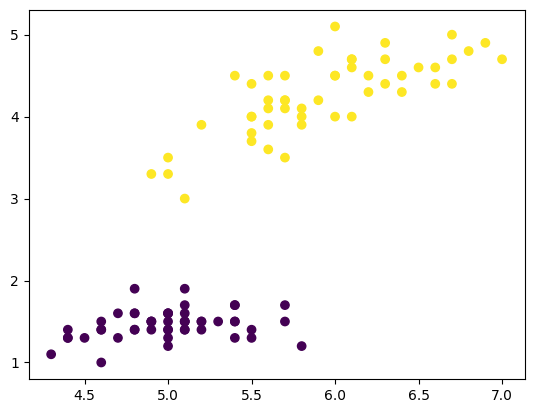

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Examine the impact of learning rate

1. Train the gradient descent algorithm with eta = 0.01, eta = 0.001, eta = 0.0001. Plot the cost as a function of epoch in each case. Note: it is useful to plot some on a log scale
2. Explain what is happening in each case?
3. How many epochs (approx) for convergence with eta = 0.0001?
4. Can you find a learning rate that converges quicker, but without overshoot?
5. The learning rate can be very sensitive, a very small change can lead to overshoot. For example, have a look at what happens between a learnign rate of 0.00045 and 0.0005, just a 5e-5 change

Please note that this is just about the simplest gradient descent implementation posssible. There are much more advanced algorithms that are typically used that improve robustness, avoid local minima, avoid overshoot and improve convergence times. So it's not all as "on a knife edge" as this example. But, in principle, picking a learning rate is still an important topic of machine learning.

In [28]:
import numpy as np

class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def train(self, X, y):

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

X = df[[' petal_length', ' petal_width']].values
y = np.where(df[' class'] == 'Iris-setosa', 1, -1)  # Convert class to +1 for setosa, -1 for virginica

# Training Adaline with different learning rates and collecting the costs
# etas = [0.01, 0.001, 0.0001]
# costs = {}
# adalines = {}

# for eta in etas:
#     ada = AdalineGD(n_iter=20, eta=eta)
#     ada.train(X, y)
#     costs[eta] = ada.cost_
#     adalines[eta] = ada

# # Plotting the cost against the number of epochs for different learning rates
# plt.figure(figsize=(10, 6))
# for eta, cost in costs.items():
#     plt.plot(range(1, len(cost) + 1), cost, label=f'eta = {eta}')
# plt.xlabel('Epoch')
# plt.ylabel('Sum-squared-error')
# plt.title('Adaline - Learning rate and cost')
# plt.legend()
# plt.grid(True)
# plt.yscale('log')
# plt.show()


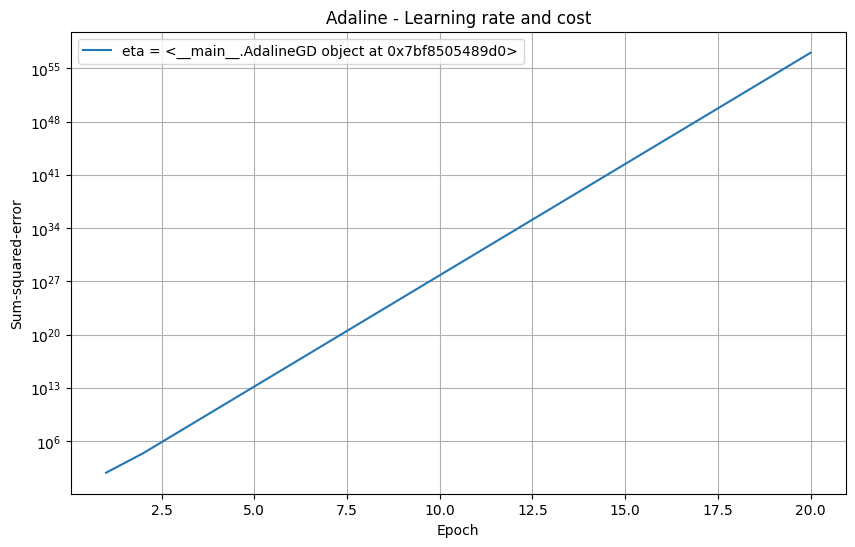

In [30]:
costs = {}
adalines = {}

ada = AdalineGD(n_iter=20, eta=0.01).train(X, y)
costs[eta] = ada.cost_
adalines[eta] = ada

# Plotting the cost against the number of epochs for different learning rates
plt.figure(figsize=(10, 6))
for eta, cost in costs.items():
  plt.plot(range(1, len(cost) + 1), cost, label=f'eta = {eta}')

plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate and cost')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


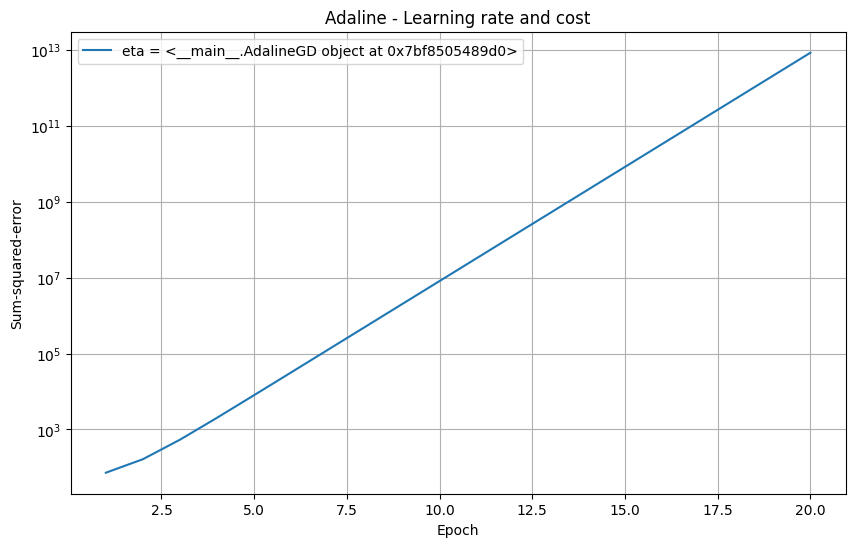

In [38]:
ada = AdalineGD(n_iter=20, eta=0.001).train(X, y)
costs[eta] = ada.cost_
adalines[eta] = ada

# Plotting the cost against the number of epochs for different learning rates
plt.figure(figsize=(10, 6))
for eta, cost in costs.items():
  plt.plot(range(1, len(cost) + 1), cost, label=f'eta = {eta}')

plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate and cost')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

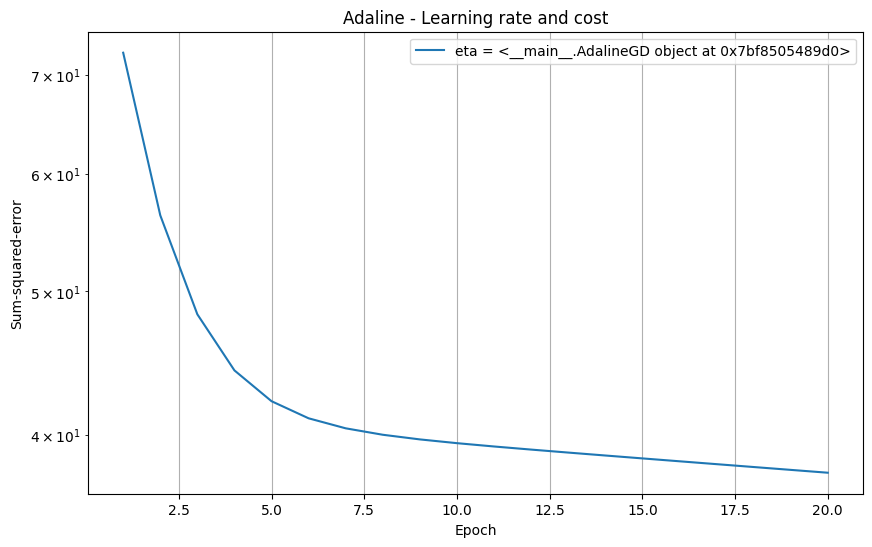

In [39]:
ada = AdalineGD(n_iter=20, eta=0.0001).train(X, y)
costs[eta] = ada.cost_
adalines[eta] = ada

# Plotting the cost against the number of epochs for different learning rates
plt.figure(figsize=(10, 6))
for eta, cost in costs.items():
    plt.plot(range(1, len(cost) + 1), cost, label=f'eta = {eta}')
plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate and cost')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

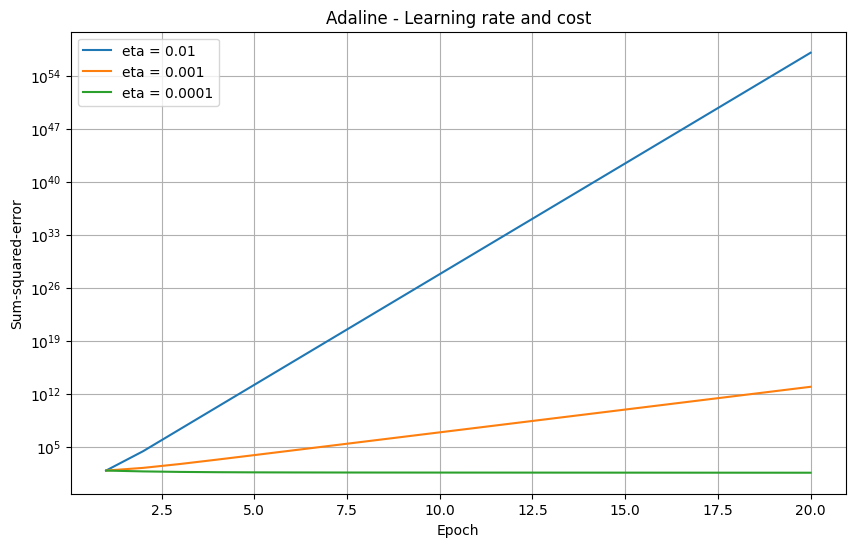

In [43]:
# Training Adaline with different learning rates and collecting the costs
etas = [0.01, 0.001, 0.0001]
costs = {}
adalines = {}

for eta in etas:
    ada = AdalineGD(n_iter=20, eta=eta)
    ada.train(X, y)
    costs[eta] = ada.cost_
    adalines[eta] = ada

# Plotting the cost against the number of epochs for different learning rates
plt.figure(figsize=(10, 6))
for eta, cost in costs.items():
    plt.plot(range(1, len(cost) + 1), cost, label=f'eta = {eta}')
plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate and cost')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


### Feature Scaling

A problem with features is that they can be on a different scale, and gradient descent can struggle with this. Feature scaling can reduce the sensitivity to learning rate, and can lead to faster convergence. One of the more common approaches to feature scaling is standardisation, given by:

\begin{equation}
\textbf{x}_{j,std} = \frac{\textbf{x}_j - \mu_j}{\sigma_j}
\end{equation}

where $\mu_j$ is the mean and $\sigma_j$ is the standard deviation of $\textbf{x}_j$. Note that we don't have a good definition for the subtraction of a vector and a scalar, but here by $\textbf{x}_j - \mu_j$ we mean the subtraction of $\mu_j$ from each element of $\textbf{x}_j$.


Ref: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

1. Implement feature scaling on the data, and retrain the algorithm
2. Print the residual cost in each iteration
3. Describe how it compares to before feature scaling
4. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

Hint: in this case, the training data was scaled, so your test data has to be scaled as well.

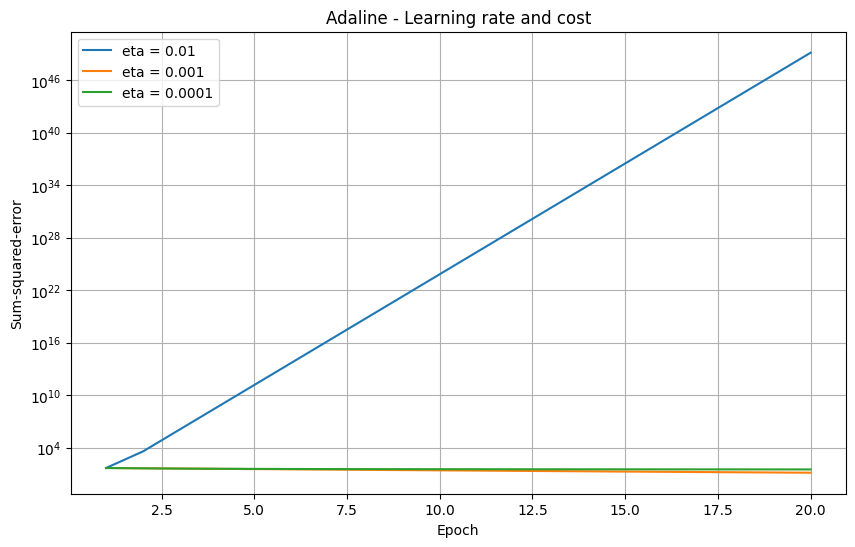

In [47]:
filtered_df = df[(df[' class'] == 'Iris-setosa') | (df[' class'] == 'Iris-virginica')]

# Extracting data
X = filtered_df[[' petal_length', ' petal_width']].values
y = np.where(filtered_df[' class'] == 'Iris-setosa', 1, -1)  # Convert class to +1 for setosa, -1 for virginica

# Training Adaline with different learning rates and collecting the costs
etas = [0.01, 0.001, 0.0001]
costs = {}
adalines = {}

for eta in etas:
    ada = AdalineGD(n_iter=20, eta=eta)
    ada.train(X, y)
    costs[eta] = ada.cost_
    adalines[eta] = ada

# Plotting the cost against the number of epochs for different learning rates
plt.figure(figsize=(10, 6))
for eta, cost in costs.items():
    plt.plot(range(1, len(cost) + 1), cost, label=f'eta = {eta}')
plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate and cost')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

## Task 2

   sepal_length   sepa_width   petal_length   petal_width        class
0           5.1          3.5            1.4           0.2  Iris-setosa
1           4.9          3.0            1.4           0.2  Iris-setosa
2           4.7          3.2            1.3           0.2  Iris-setosa
3           4.6          3.1            1.5           0.2  Iris-setosa
4           5.0          3.6            1.4           0.2  Iris-setosa
    petal_length   petal_width
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2


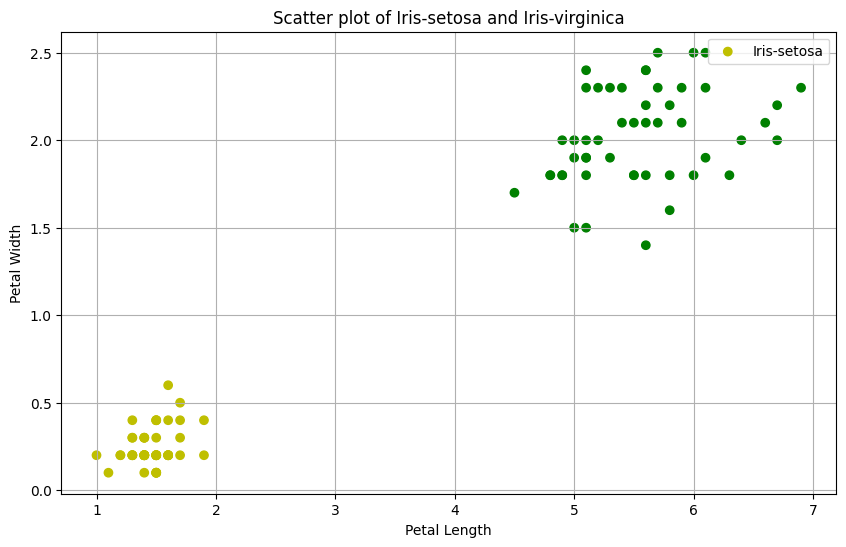

In [58]:
filtered_df = df[(df[' class'] == 'Iris-setosa') | (df[' class'] == 'Iris-virginica')]
print(filtered_df.head())
features_df = filtered_df[[' petal_length', ' petal_width']]
print(features_df.head())

import matplotlib.pyplot as plt
colors = {'Iris-setosa': 'y', 'Iris-virginica': 'g'}
plt.figure(figsize=(10, 6))
plt.scatter(features_df[' petal_length'], features_df[' petal_width'], c=filtered_df[' class'].apply(lambda x: colors[x]), label=colors, marker='o')
plt.title('Scatter plot of Iris-setosa and Iris-virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(colors.keys())
plt.grid(True)
plt.show()

In [59]:
from sklearn.linear_model import Perceptron as Perceptron
X = features_df.values
y = (filtered_df[' class'] == 'Iris-setosa').astype(int).values  # Convert class to binary labels (1 for setosa, 0 for virginica)
perceptron = Perceptron(verbose=1, max_iter=1000, tol=1e-3)
perceptron.fit(X, y)


-- Epoch 1
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 100, Avg. loss: 0.164200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

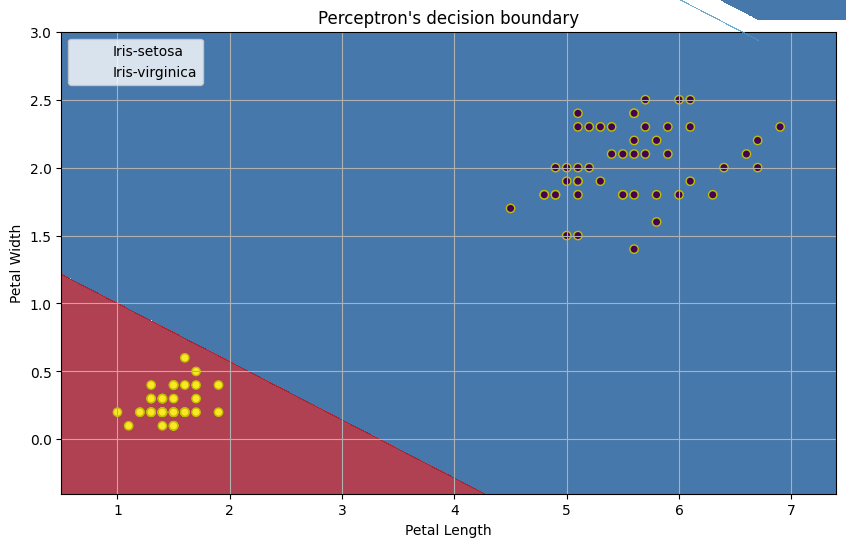

In [63]:
import random
x_min, x_max = features_df[' petal_length'].min() - 0.5, features_df[' petal_length'].max() + 0.5
y_min, y_max = features_df[' petal_width'].min() - 0.5, features_df[' petal_width'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 5000), np.linspace(y_min, y_max, 5000))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdBu_r')
plt.scatter(features_df[' petal_length'], features_df[' petal_width'], c=y, edgecolors='y')
plt.title("Perceptron's decision boundary")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(colors.keys(), loc='upper left')
plt.grid(True)
plt.show()

